In [2]:
import trompy as tp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches

In [3]:
%run ..//source//FED_functions.py

File is excel file. Making csv metafile first
File is excel file. Making csv metafile first
File is excel file. Making csv metafile first


In [4]:
nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"} 

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


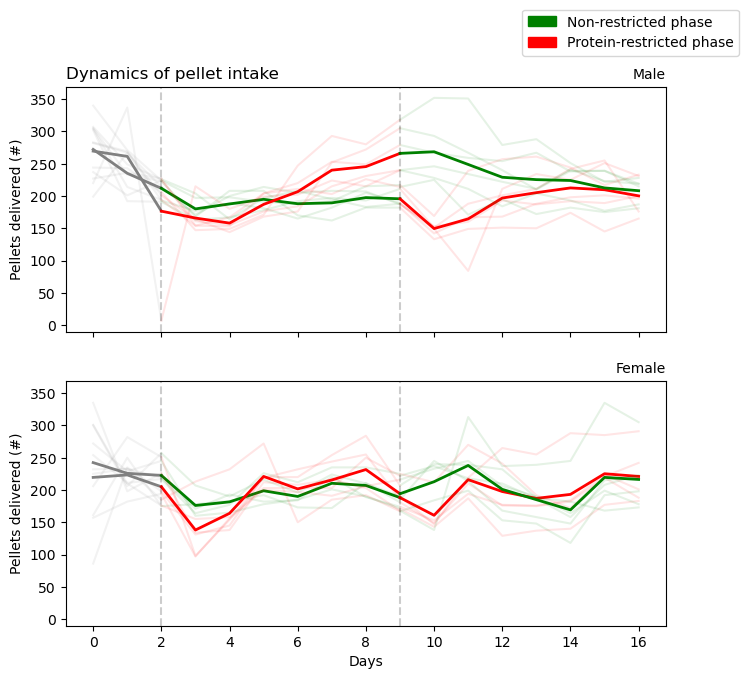

In [35]:
#plot shows timeline of total number of pellets delievered per day in NRPR and PRNR male and Females
def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]
    #plt.rcParams["font.size"] = 18

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel, fontsize= 10)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
   

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["all_pellets_per_day"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["all_pellets_per_day"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["all_pellets_per_day"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["all_pellets_per_day"], prnr_female_selector)

f, ax = plt.subplots(nrows=2, sharex=True, figsize=(8,7), gridspec_kw= {"left": 0.15})

timeline_multicolor_fig([nrpr_m, prnr_m], colors=["green", "red"], ylabel="Pellets delivered (#)",ax=ax[0])
timeline_multicolor_fig([nrpr_f, prnr_f], colors=["green", "red"], ylabel="Pellets delivered (#)", ax=ax[1])



ax[1].set_xlabel("Days", fontsize = 10)
ax[0].set_title("Dynamics of pellet intake", fontsize = 12, loc= "left")
ax[0].set_title("Male", fontsize = 10, loc= "right")
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_title("Female", fontsize = 10, loc ="right")



#legends
fed_cols = ["green", "red"]
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted phase')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted phase')
ax[0].legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1,1),
             bbox_transform=f.transFigure)


#Try adding error bars
# f, ax = plt.subplots()
# nrpr_m.mean(axis=1).plot(yerr= nrpr_m.sem(axis=1), ax=ax)
# prnr_m.mean(axis=1).plot(yerr= prnr_m.sem(axis=1), ax=ax)



figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Educational Component\Midway_Evaluation\MIDWAY_PRESENTATION\FIGS\\"
f.savefig(figfolder + "timeline pellets delievered+.tif")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary


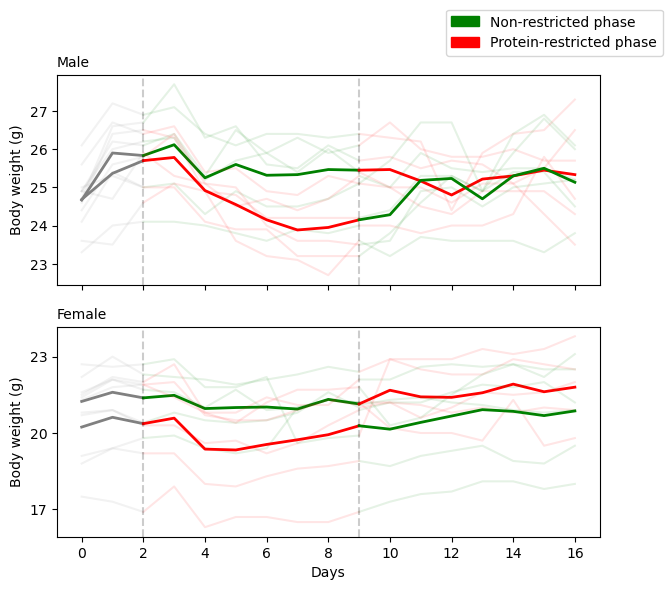

In [128]:
#plot shows timeline of body weights per day in NRPR and PRNR male and Females

def timeline_fig(data, ax=[], ylabel="", **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object
    
    for trace in data:
        ax.plot(trace, color="grey", alpha=0.3)
    ax.plot(np.mean(data, axis=0), linewidth=2)

    ax.set_ylabel(ylabel)
    ax.axvline(2, linestyle="--", color="k")
    ax.axvline(9, linestyle="--", color="k")

    return ax

def timeline_multicolor_fig(data, ax=[], ylabel="", colors=[], day_split=[2, 9], max_days=17, **kwargs):
    if ax == []:
        f, ax = plt.subplots() #could check if ax is axis object

    colors_reversed = colors[-1:]

    for group in data:
        for trace in group:
            trace = trace[:max_days]
            ax.plot(range(0,3), trace[:3], color="grey", alpha=0.1)
            ax.plot(range(2,10), trace[2:10], color=colors[0], alpha=0.1)
            ax.plot(range(9,len(trace)), trace[9:], color=colors[1], alpha=0.1)

        mean = np.mean(group, axis=0)[:max_days]
        ax.plot(range(0,3), mean[:3], color="grey", linewidth=2)
        ax.plot(range(2,10), mean[2:10], color=colors[0], linewidth=2)
        ax.plot(range(9,len(mean)), mean[9:], color=colors[1], linewidth=2)

        colors.reverse()

    ax.set_ylabel(ylabel,fontsize = 10)
    ax.axvline(2, linestyle="--", color="k", alpha=0.2)
    ax.axvline(9, linestyle="--", color="k", alpha=0.2)

    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)

    return ax

nrpr_male_selector = {"order": 1, "sex": "M"}
prnr_male_selector = {"order": 2, "sex": "M"}
nrpr_female_selector = {"order": 1, "sex": "F"}
prnr_female_selector = {"order": 2, "sex": "F"}

nrpr_m = get_data_fields(mice, ["bodyweight"], nrpr_male_selector)
prnr_m = get_data_fields(mice, ["bodyweight"], prnr_male_selector)
nrpr_f = get_data_fields(mice, ["bodyweight"], nrpr_female_selector)
prnr_f = get_data_fields(mice, ["bodyweight"], prnr_female_selector)

f, ax = plt.subplots(nrows=2, sharex=True, figsize=(7,6))

timeline_multicolor_fig([nrpr_m, prnr_m], colors=["green", "red"], ylabel="Body weight (g)", ax=ax[0])
timeline_multicolor_fig([nrpr_f, prnr_f], colors=["green", "red"], ylabel="Body weight (g)", ax=ax[1])

#legends
fed_cols = ["green", "red"]
NR_patch = mpatches.Patch(color=fed_cols[0], label='Non-restricted phase')
PR_patch = mpatches.Patch(color=fed_cols[1], label='Protein-restricted phase')
ax[0].legend(handles=[NR_patch, PR_patch],
             bbox_to_anchor=(1, 1),
             bbox_transform=f.transFigure)


ax[1].set_xlabel("Days",fontsize = 10)
ax[1].set_yticks([17,20,23])
ax[0].set_title("Male", fontsize = 10, loc= "left")
ax[1].set_title("Female", fontsize = 10, loc ="left")




figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Educational Component\Midway_Evaluation\MIDWAY_PRESENTATION\FIGS\\"
#f.savefig(figfolder + "timeline bodyweight.tif")

6 items in output dictionary
6 items in output dictionary
5 items in output dictionary
6 items in output dictionary
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>
<BarContainer object of 1 artists>


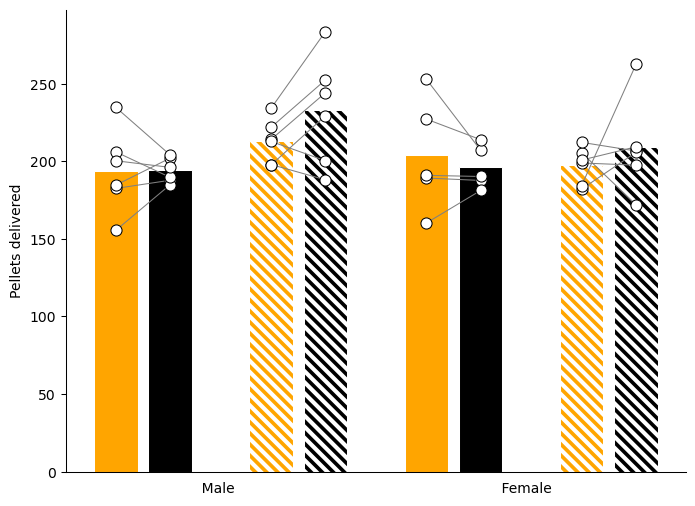

In [110]:
#plot for average number of pellets taken by NRPR and PRNR males and Females

nrpr_avg = get_data_fields(mice, ["pr_avg_pellets","nr_avg_pellets" ],nrpr_male_selector)
prnr_avg = get_data_fields(mice, ["pr_avg_pellets", "nr_avg_pellets"],prnr_male_selector)
nrprf_avg = get_data_fields(mice, ["pr_avg_pellets","nr_avg_pellets"],nrpr_female_selector)
prnrf_avg = get_data_fields(mice, ["pr_avg_pellets","nr_avg_pellets"],prnr_female_selector)

f, ax = plt.subplots(figsize= (8, 6))
_, _, barlist, _ = tp.barscatter([nrpr_avg, prnr_avg, nrprf_avg, prnrf_avg], ax=ax, paired=True,linewuidth =1, groupwidth = 0.70,
barfacecolor_option="individual", baredgecolor= ["white"]*8, barfacecolor=["orange", "black", "orange", "black", "orange", "black", "orange", "black"],
barlabels = ["NRPR Males", "PRNR Males", "NRPR Females", "PRNR Females"] )

ax.set_ylabel("Pellets delivered",fontsize = 10)
ax.set_xlabel("                               Male                                                             Female", loc="left")
plt.rcParams["hatch.linewidth"] = 3

# this code puts hatching on bars 3 and 4 

for i in [barlist[2], barlist[3], barlist[6],barlist[7]]:
    print(i)
    bar = i.get_children()
    bar[0].set_hatch("\\\\\\")
    bar[0].set_edgecolor("white")

    
    

figfolder = r"C:\Users\hta031\OneDrive - UiT Office 365\Documents\People\Hamid\Educational Component\Midway_Evaluation\MIDWAY_PRESENTATION\FIGS\\"
#f.savefig(figfolder + "avreage pellets delievered.tif")